In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
data0 = pd.read_excel('database.xlsx')  # 读取训练数据
data0.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-29,19.000000,25.00,17.540001,23.889999,23.889999,18766300
1,2010-06-30,25.790001,30.42,23.299999,23.830000,23.830000,17187100
2,2010-07-01,25.000000,25.92,20.270000,21.959999,21.959999,8218800
3,2010-07-02,23.000000,23.10,18.709999,19.200001,19.200001,5139800
4,2010-07-06,20.000000,20.00,15.830000,16.110001,16.110001,6866900


In [8]:
rate_origin=data0['Volume']

In [9]:
feat=6
data=data0.iloc[:,1:]
yy=data0.iloc[:,feat:]#切片是前闭后开[)
data=(data - data.min()) / (data.max() - data.min())
data.tail()

,Open,High,Low,Close,Adj Close,Volume
2411,0.840012,0.727970,0.824703,0.721146,0.721146,0.248581
2412,0.850962,0.744851,0.838901,0.739584,0.739584,0.376663
2413,0.937237,0.824226,0.915692,0.817862,0.817862,0.615322
2414,0.948764,0.826981,0.937741,0.830633,0.830633,0.332310
2415,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [10]:
X=data.iloc[:-1,:]
y=data.iloc[1:,feat-1:feat]#切片是前闭后开[)
print(X.shape)
print(y.shape)

(2415, 6)
(2415, 1)


In [11]:
y=pd.DataFrame(y.values,columns=['goal'])
x=X

In [12]:
cut=len(y)*9//10
X_train, X_test=x.iloc[:cut],x.iloc[cut:]#列表的切片操作，X.iloc[0:2400，0:7]即为1-2400行，1-7列
y_train, y_test=y.iloc[:cut],y.iloc[cut:]
print(X_train.size)#通过输出训练集测试集的大小来判断数据格式正确。
print(X_test.size)
print(y_train.size)
print(y_test.size)

13038
1452
2173
242


In [13]:
X_train,X_test,y_train,y_test=X_train.values,X_test.values,y_train.values,y_test.values
#X=X.values#将Pandas中的dataframe转成numpy中的array，（转化成数组）才能进行多元线性回归的计算
#y=y.values
print(X_train)
print(y_train)

[[0.00434948 0.01087705 0.00388739 0.01058623 0.01058623 0.39721385]
 [0.01467569 0.0179205  0.01263401 0.01050772 0.01050772 0.36357556]
 [0.01347426 0.01207262 0.00803292 0.00806072 0.00806072 0.17254321]
 ...
 [0.45633033 0.39188574 0.44741396 0.38734624 0.38734624 0.11500538]
 [0.45047526 0.3848163  0.44126401 0.38258311 0.38258311 0.10699626]
 [0.43683371 0.37704511 0.4343244  0.37682542 0.37682542 0.10825727]]
[[0.36357556]
 [0.17254321]
 [0.10695792]
 ...
 [0.10699626]
 [0.10825727]
 [0.08065351]]


In [14]:
from keras.models import Sequential
from keras.layers.core import Dense, Activation
from keras.optimizers import Adam
model = Sequential()  #层次模型
model.add(Dense(16,input_dim=6,init='uniform')) #输入层，Dense表示BP层
model.add(Activation('relu'))  #添加激活函数
model.add(Dense(1,input_dim=12))  #输出层
model.compile(loss='mean_squared_error', optimizer='Adam') #编译模型
model.fit(X_train, y_train, nb_epoch = 100, batch_size = 16) #训练模型1000次

E:\anoconda\envs\tensorflow\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.
E:\anoconda\envs\tensorflow\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
E:\anoconda\envs\tensorflow\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
E:\anoconda\envs\tensorflow\lib\site-packages\tensorflow\pytho

Epoch 1/100
2173/2173 [==============================] - 0s 146us/step - loss: 0.0071
Epoch 2/100
2173/2173 [==============================] - 0s 54us/step - loss: 0.0053
Epoch 3/100
2173/2173 [==============================] - 0s 57us/step - loss: 0.0044
Epoch 4/100
2173/2173 [==============================] - 0s 64us/step - loss: 0.0040
Epoch 5/100
2173/2173 [==============================] - 0s 54us/step - loss: 0.0039
Epoch 6/100
2173/2173 [==============================] - 0s 49us/step - loss: 0.0038
Epoch 7/100
2173/2173 [==============================] - 0s 47us/step - loss: 0.0039
Epoch 8/100
2173/2173 [==============================] - 0s 46us/step - loss: 0.0038
Epoch 9/100
2173/2173 [==============================] - 0s 47us/step - loss: 0.0038
Epoch 10/100
2173/2173 [==============================] - 0s 48us/step - loss: 0.0038
Epoch 11/100
2173/2173 [==============================] - 0s 57us/step - loss: 0.0038
Epoch 12/100
2173/2173 [==============================] - 0s 5

2173/2173 [==============================] - 0s 77us/step - loss: 0.0038
Epoch 97/100
2173/2173 [==============================] - 0s 69us/step - loss: 0.0038
Epoch 98/100
2173/2173 [==============================] - 0s 68us/step - loss: 0.0038
Epoch 99/100
2173/2173 [==============================] - 0s 69us/step - loss: 0.0038
Epoch 100/100
2173/2173 [==============================] - 0s 71us/step - loss: 0.0038


In [15]:
y_train_predict=model.predict(X_train)
y_train_predict=y_train_predict[:,0]

Text(0.5,1,'Train Data')

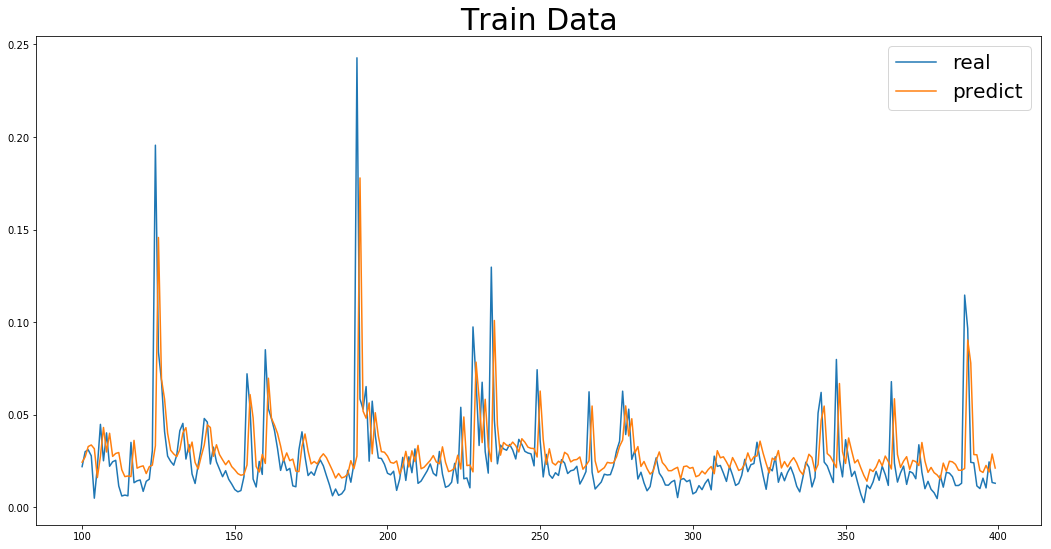

In [16]:
draw=pd.concat([pd.DataFrame(y_train),pd.DataFrame(y_train_predict)],axis=1)
draw.iloc[100:400,0].plot(figsize=(18,9))
draw.iloc[100:400,1].plot(figsize=(18,9))
plt.legend(('real', 'predict'),loc='upper right',fontsize='20')
plt.title("Train Data",fontsize='30') #添加标题
#展示在训练集上的表现 

In [17]:
y_test_predict=model.predict(X_test)
y_test_predict=y_test_predict[:,0]

Text(0.5,1,'Test Data')

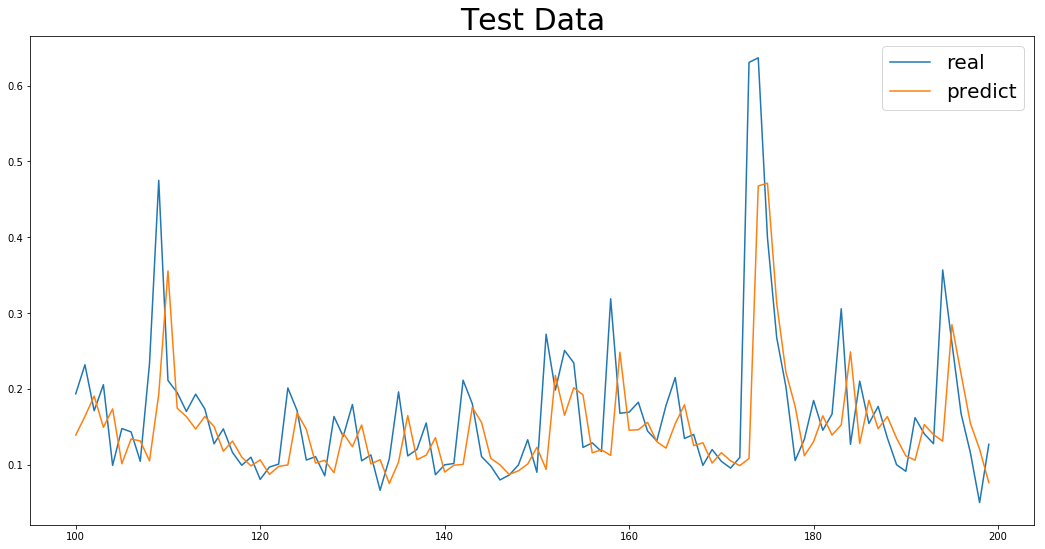

In [18]:
draw=pd.concat([pd.DataFrame(y_test),pd.DataFrame(y_test_predict)],axis=1);
draw.iloc[100:200,0].plot(figsize=(18,9))
draw.iloc[100:200,1].plot(figsize=(18,9))
plt.legend(('real', 'predict'),loc='upper right',fontsize='20')
plt.title("Test Data",fontsize='30') #添加标题
#展示在测试集上的表现 

In [19]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
print(mean_absolute_error(y_train_predict, y_train))
print(mean_squared_error(y_train_predict, y_train) )
#训练集上的MAE和MSE

0.03388248924728328
0.003793915041257656


In [20]:
print(mean_absolute_error(y_test_predict, y_test))
print(mean_squared_error(y_test_predict, y_test) )
#测试集上的MAE和MSE

0.07047817004260297
0.012483215444418699


In [22]:
predata=model.predict(X_test)[:,0]
out=predata*(rate_origin.max()-rate_origin.min())+rate_origin.min()
df0 = pd.DataFrame(out)
print('已经保存预测数据在文件predict_value.csv中')
df00=pd.concat([data0.iloc[-len(out):,0:1], df0], axis=1)
df00.to_csv('predict_volume_bp.csv')

已经保存预测数据在文件predict_value.csv中
